**A. UNIVARIATE VISUALIZATION**

1. Bar Chart

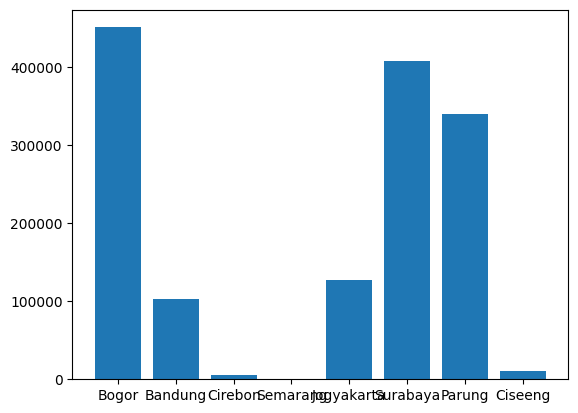

In [ ]:
import matplotlib.pyplot as plt

cities = ('Bogor', 'Bandung', 'Cirebon', 'Semarang', 'Jogyakarta', 'Surabaya', 'Parung', 'Ciseeng')

populations = (450500, 102400, 5300, 890, 126900, 407980, 339208, 10490)

plt.bar(x = cities, height = populations)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

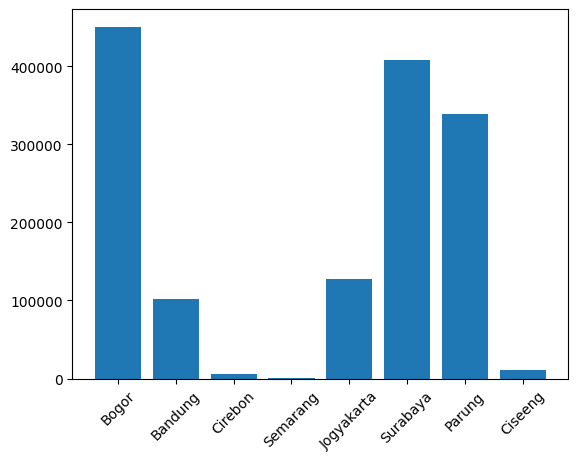

In [ ]:
plt.bar(x = cities, height = populations)
plt.xticks(rotation = 45)
plt.show

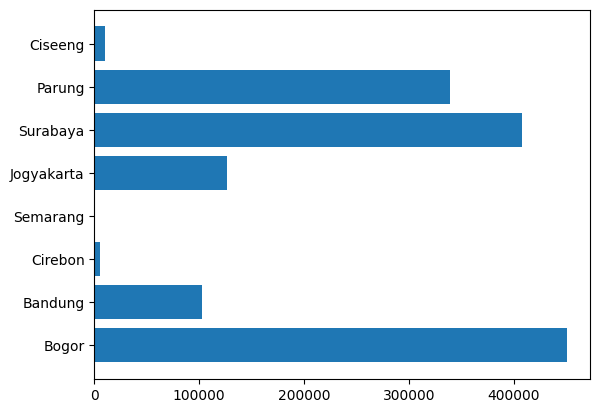

In [ ]:
plt.barh(y = cities, width = populations)
plt.show()

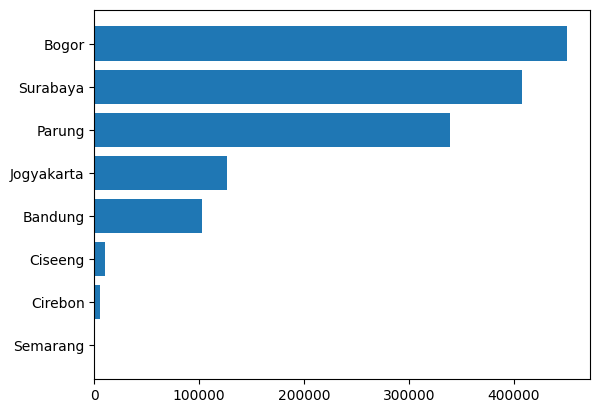

In [ ]:
# Karena data nominal dapat diurutkan, ubah dulu dari data menjadi dataframe
import pandas as pd

df = pd.DataFrame({
    'Cities' : cities,
    'Populations' : populations
})

df.sort_values(by = 'Populations', inplace = True)

plt.barh(y = df['Cities'], width = df['Populations'])
plt.show()

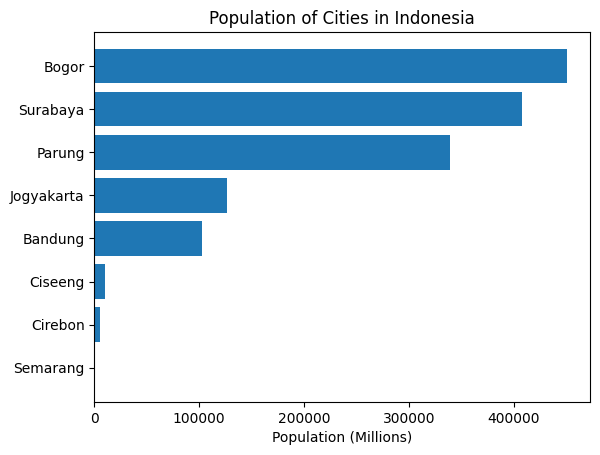

In [ ]:
# Menambahkan judul dan keterangan sumbu
plt.barh(y = df['Cities'], width = df['Populations'])
plt.xlabel("Population (Millions)")
plt.title("Population of Cities in Indonesia")
plt.show()

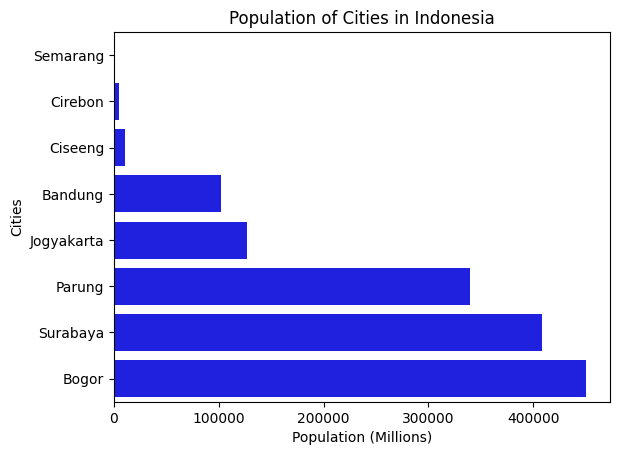

In [ ]:
# Pakai library seaborn
import seaborn as sns

sns.barplot(y = df['Cities'], x = df['Populations'], orient = 'h', color = 'blue')
plt.xlabel("Population (Millions)")
plt.title("Population of Cities in Indonesia")
plt.show()

2. Pie Chart

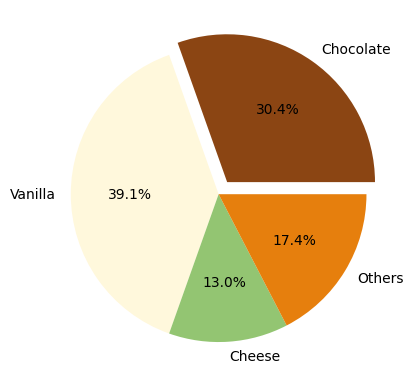

In [ ]:
import matplotlib.pyplot as plt

flavors = ('Chocolate','Vanilla','Cheese','Others')
votes = (70,90,30,40)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)

plt.pie(
    x = votes,
    labels = flavors,
    autopct = '%1.1f%%',
    colors = colors,
    explode = explode
)

plt.show()

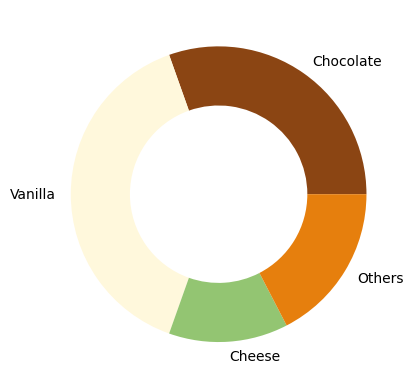

In [ ]:
# parameter wedgeprops untuk membuat donut chart
plt.pie(
    x = votes,
    labels = flavors,
    colors = colors,
    wedgeprops = {'width' : 0.4}
)

plt.show()

3. Histogram

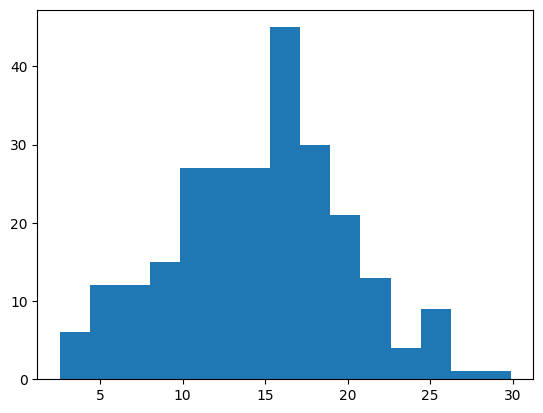

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.normal(15,5,250) # 250 titik data, standar deviation = 5, mean = 15

plt.hist(x = x, bins = 15)
plt.show()

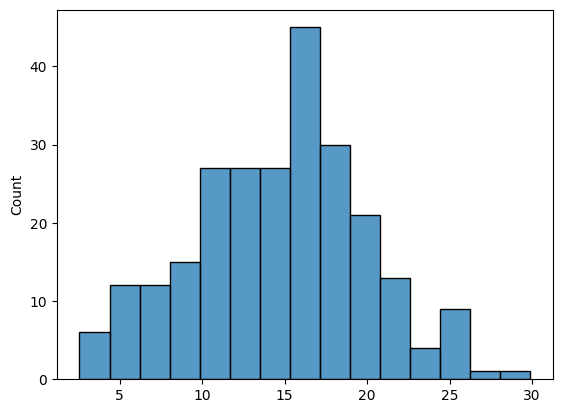

In [ ]:
# Membuat histogram pakai seaborn
import seaborn as sns

sns.histplot(x = x, bins = 15)
plt.show()

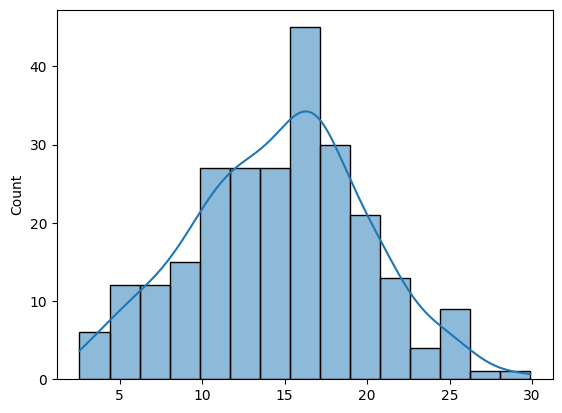

In [ ]:
sns.histplot(x = x, bins = 15, kde = True) # densitas distribusi
plt.show()

4. Box Plot

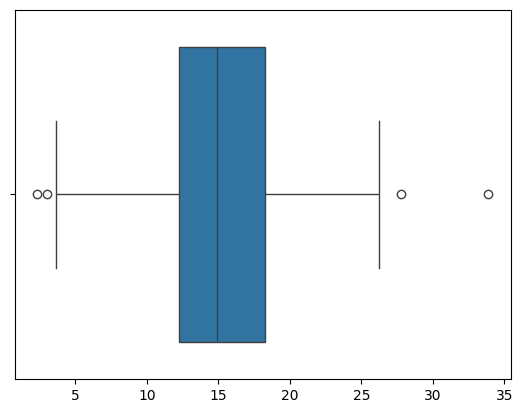

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.random.normal(15,5,250)
sns.boxplot(x = x)
plt.show()

B. BIVARIATE DAN MULTIVARIATE VISUALIZATION

1. Scatter Plot

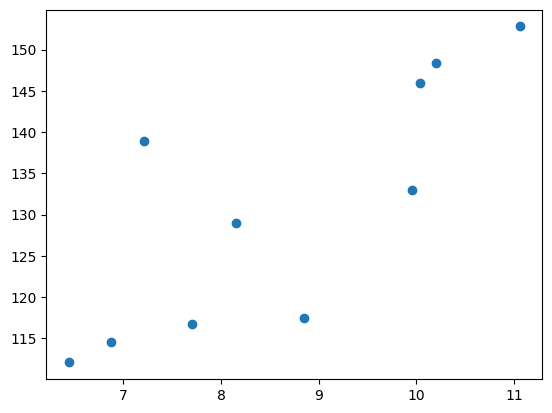

In [ ]:
import matplotlib.pyplot as plt

lemon_diameter = [6.44, 6.87, 7.7, 8.85, 8.15,
                  9.96, 7.21, 10.04, 10.2, 11.06]
lemon_weight = [112.05, 114.58, 116.71, 117.4, 128.93,
                132.93, 138.92, 145.98, 148.44, 152.81]

plt.scatter(x = lemon_diameter, y = lemon_weight)
plt.show()

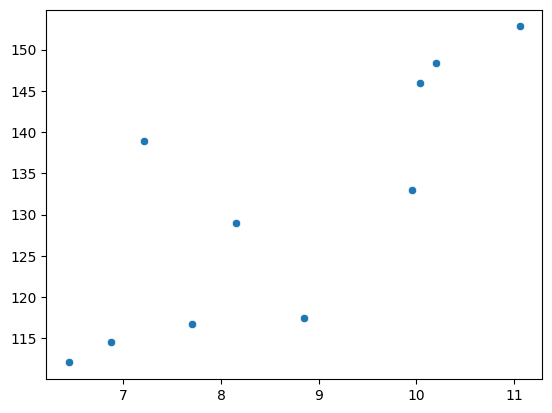

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x = lemon_diameter, y = lemon_weight)
plt.show()

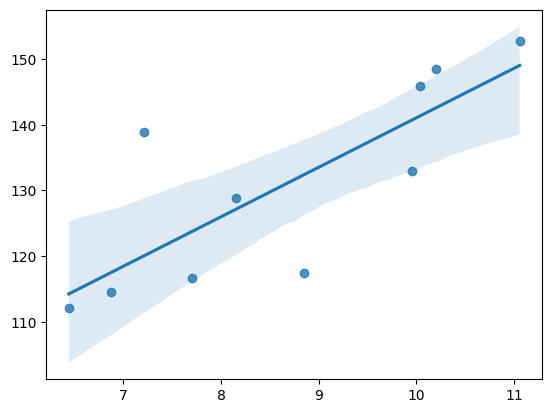

In [ ]:
# Melihat korelasi
sns.regplot(x = lemon_diameter, y = lemon_weight)
plt.show()

2. Line Chart

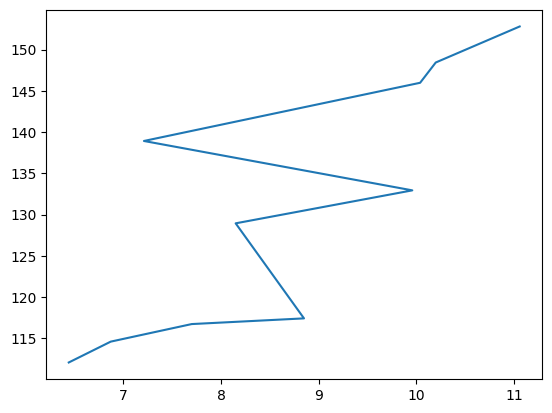

In [ ]:
import matplotlib.pyplot as plt

plt.plot(lemon_diameter, lemon_weight)
plt.show()

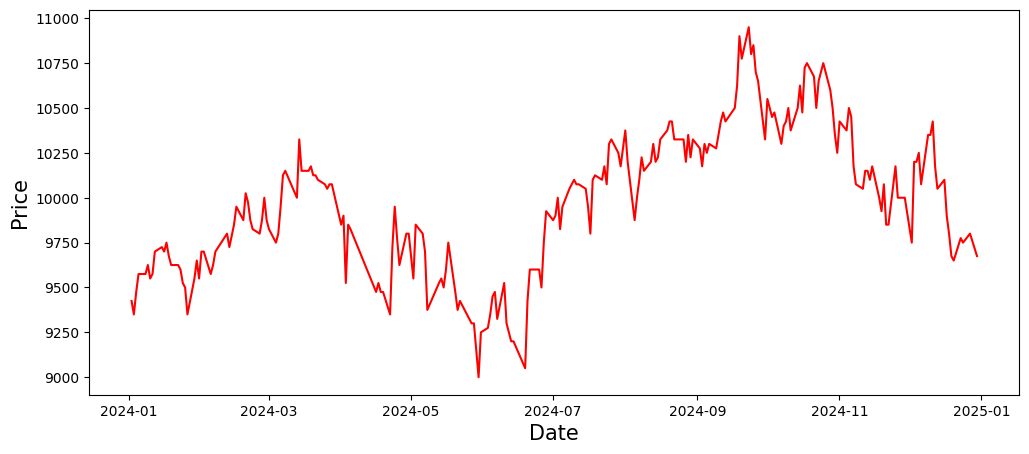

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

url = 'https://query1.finance.yahoo.com/v8/finance/chart/BBCA.JK?events=capitalGain%7Cdiv%7Csplit&formatted=true&includeAdjustedClose=true&interval=1d&period1=1704165596&period2=1735689600&symbol=BBCA&userYfid=true&lang=en-US&region=US'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Ambil data dari URL
response = requests.get(url, headers=headers)

# Konversi data JSON menjadi DataFrame
data = response.json()

# Ekstraksi data dari JSON
timestamps = data['chart']['result'][0]['timestamp']
indicators = data['chart']['result'][0]['indicators']['quote'][0]

# Membuat DataFrame
df = pd.DataFrame({
    'timestamp': pd.to_datetime(timestamps, unit='s'),
    'open': indicators['open'],
    'high': indicators['high'],
    'low': indicators['low'],
    'close': indicators['close'],
    'volume': indicators['volume'],
})

plt.figure(figsize=(12, 5))
plt.plot(df['timestamp'], df['close'], color='red')
plt.xlabel('Date',size=15)
plt.ylabel('Price',size=15)
plt.show()

3. Clustered bar chart

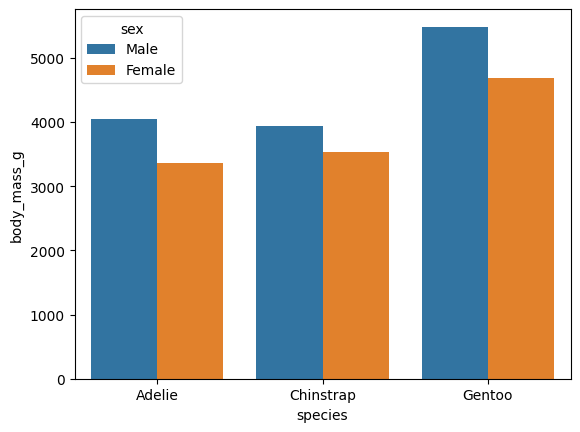

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")

sns.barplot(data = penguins, x = 'species', y = 'body_mass_g', hue = 'sex', errorbar = None)
plt.show()

# Komponen Visual Tambahan
Membuat lebih dari satu boxplot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

df_boxplot = df[["Open", "High", "Low", "Close", "Adj Close"]]

sns.boxplot(data = df_boxplot, pallete = "rocket")
plt.ylabel('Price', size = 15)
plt.show()

HTTPError: HTTP Error 429: Too Many Requests

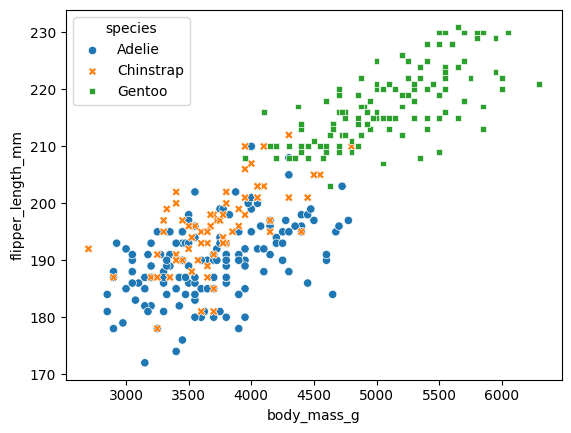

In [ ]:
import seaborn as sns

penguins = sns.load_dataset("penguins")

sns.scatterplot(data=penguins, x="body_mass_g", y="flipper_length_mm", hue="species", style="species")
plt.show()

C. EXPLANATORY ANALYSIS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://query1.finance.yahoo.com/v7/finance/download/BBCA.JK?period1=1644796800&period2=1676332800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Close', color='red')
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.title('BBCA Stock Price', size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Price (IDR)',size=15)
plt.legend()
plt.show()

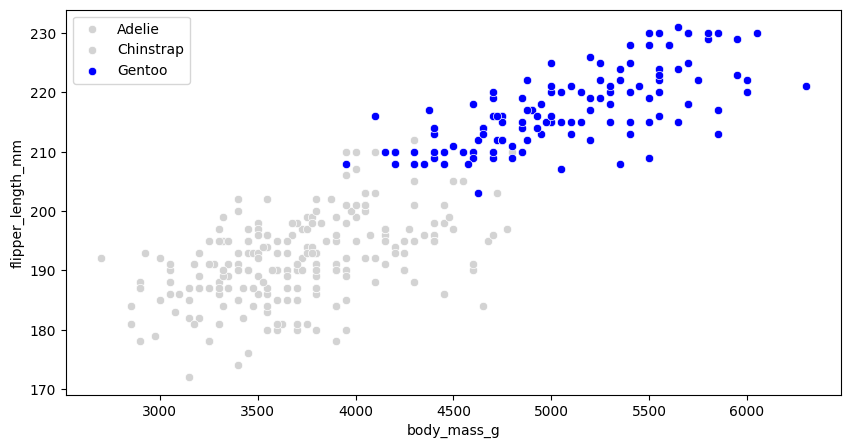

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins_df = sns.load_dataset("penguins")

adelie_df = penguins_df[penguins_df.species == "Adelie"]
chinstrap_df = penguins_df[penguins_df.species == "Chinstrap"]
gentoo_df = penguins_df[penguins_df.species == "Gentoo"]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=adelie_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Adelie")
sns.scatterplot(data=chinstrap_df, x="body_mass_g", y="flipper_length_mm", facecolor="lightgrey", label="Chinstrap")
sns.scatterplot(data=gentoo_df, x="body_mass_g", y="flipper_length_mm", facecolor="blue", label="Gentoo")
plt.legend()
plt.show()